In [4]:
import dynamics_analysis as da
import matplotlib.pyplot as plt
from copy import deepcopy
import numpy as np

%load_ext autoreload
%autoreload 2 
plt.rcParams["figure.figsize"] = (4.5,3.5)
plt.rc('legend', fontsize = 10)
plt.rcParams["legend.framealpha"] = 1

keynote_folder_path='/Users/nicolas/Library/Mobile Documents/com~apple~Keynote/Documents/YIF_annual_meeting/'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Decay rate calibration


In [2]:
path_fortran_300 = '../../data_fortran/MPOL_DCT_300/data/'
path_400 = '../../data_fortran/MPOL_DCT_400/data/'

dyns={}
paramchar= "nl2_n2_60_E0.60E-01_dtadd0.20_0.20_4_ar0.0_g0.250_gam0.051487_nm250_p0.5E-05_wq5.3037_wc7.500_bc2.300_5.200_7.500_12.600_bw3.000_mr0.00_0.50_0.00_wd7.500_ad0.2236_anh159.155_dt0.0050_errl0.1E-03_lsfe14_qb2_cv0.0_tmax40_TRSM3"
dyns["n=60 gcst"] = da.dynamics(2,path_fortran_300, paramchar)
paramchar= "nl2_n2_40_E0.10E+00_dtadd0.05_0.05_4_ar0.0_g0.250_gam0.007407_nm250_p0.5E-05_wq5.3037_wc7.500_bc2.300_5.200_6.500_12.600_bw4.000_mr0.00_0.00_0.00_wd7.500_ad0.2236_anh159.155_dt0.0050_errl0.1E-03_lsfe12_qb2_cv0.0_tmax30_TRSM3"
dyns['n=40 gsqrt'] = da.dynamics(2,path_400, paramchar)

path_me = '../../data_me/data_wq5304_27_03_2024/'
paramchar_me= "tmax40_Nq2_Nc30_amp0.2236_kappa0.1010_wq5.3037_anh15.7563_wc7.5000_g0.2500_wd7.5000_ms1e-02_dimexp20_qb[1,'B']_11_TRSM3.txt"
times_me = np.loadtxt(path_me+"TIMES_"+paramchar_me)
photons_me = np.loadtxt(path_me+"PHOTONS_"+paramchar_me)
pplt_me = np.loadtxt(path_me+"PPLT_"+paramchar_me)

Gamma=0.1*2*np.pi


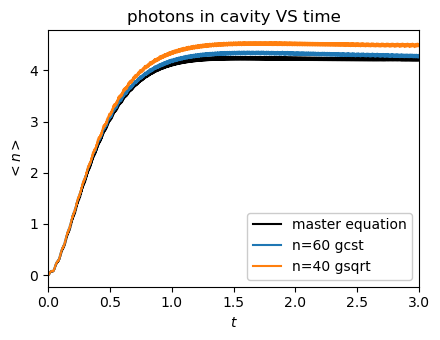

In [5]:
plt.plot( (Gamma/(2*np.pi))*times_me, photons_me, label='master equation',c='black'  )  
for key in dyns:
    plt.plot( (Gamma/(2*np.pi))*dyns[key].times, dyns[key].nk[:,0], label=key  )  
plt.ylabel( "$<n>$" )
plt.xlabel( "$t$" )
plt.title( "photons in cavity VS time"  )
plt.legend()
plt.xlim(0,3)
plt.tight_layout()
plt.savefig( keynote_folder_path+'photons_convergence.pdf',format='pdf' )
plt.show()

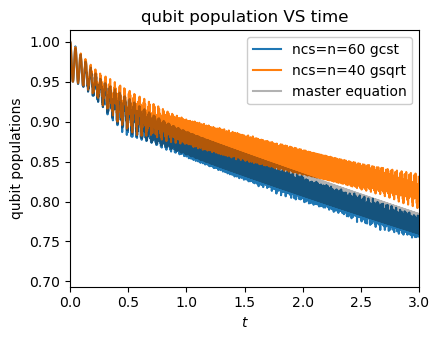

In [6]:
for key in dyns:
    plt.plot( (Gamma/(2*np.pi))*dyns[key].times, dyns[key].pplt[:,1], label='ncs='+str(key)  )
plt.plot( (Gamma/(2*np.pi))*times_me, pplt_me[:,1], label='master equation',c='black', alpha=0.3  )  
plt.ylabel( "qubit populations" )
plt.xlabel( "$t$" )
plt.title( "qubit population VS time"  )
plt.xlim(0,3)
#plt.plot( times_me, pplt_me[:,2], label='master equation',c='black', alpha=0.3  )  
plt.legend()
plt.tight_layout()
plt.savefig( keynote_folder_path+'qubit_excited_population.pdf',format='pdf' )
plt.show()

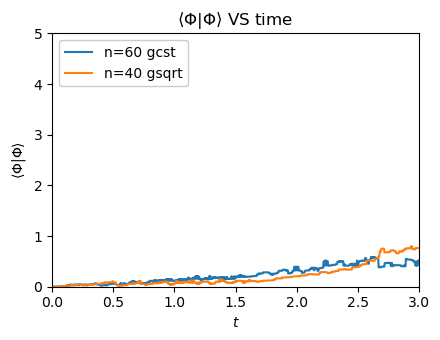

In [18]:
for key in dyns:
    plt.plot( (Gamma/(2*np.pi))*dyns[key].times, dyns[key].error, label=key  )
plt.ylim(0,5)
plt.xlim(0,3)
plt.ylabel( r"$\langle \Phi | \Phi \rangle$" )
plt.xlabel( "$t$" )
plt.title( r"$\langle \Phi | \Phi \rangle$ VS time"  )
plt.legend(loc='upper left')
plt.tight_layout()
plt.savefig( keynote_folder_path+'error_convergence.pdf',format='pdf' )
plt.show()

## CAVITY PHOTON NUMBER and ERROR versus time

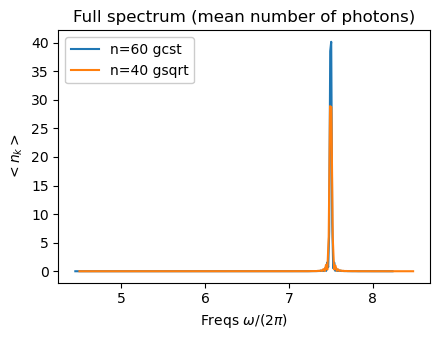

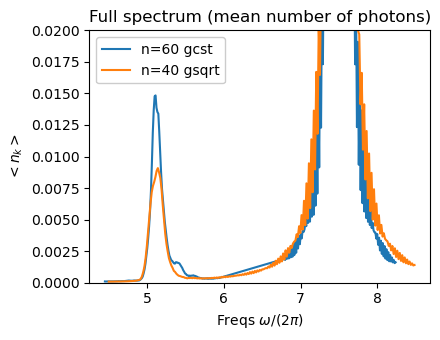

In [7]:
for key in ["n=60 gcst",'n=40 gsqrt']:
    plt.plot( dyns[key].wk[:]/(2*np.pi), dyns[key].nk[-1,1:], label=key  )

#plt.xlim(4.5,5.7)
#plt.ylim(0,0.01)
plt.title( "Full spectrum (mean number of photons)"  )
plt.xlabel( "Freqs $\omega/(2\pi)$"  )
plt.ylabel( "$<n_k>$" )
plt.legend()
plt.tight_layout()
plt.savefig( keynote_folder_path+'spectrum_full.pdf',format='pdf' )
plt.show()

for key in ["n=60 gcst",'n=40 gsqrt']:
    plt.plot( dyns[key].wk[:]/(2*np.pi), dyns[key].nk[-1,1:], label=key  )
#plt.xlim(4.5,5.7)
plt.ylim(0,0.02)
plt.title( "Full spectrum (mean number of photons)"  )
plt.xlabel( "Freqs $\omega/(2\pi)$"  )
plt.ylabel( "$<n_k>$" )
plt.legend()
plt.tight_layout()
plt.savefig( keynote_folder_path+'spectrum_zoomed_in.pdf',format='pdf' )
plt.show()